---
<div class="alert alert-success" data-title="">
  <h2><i class="fa fa-tasks" aria-hidden="true"></i> 사이킷런을 사용한 Boston 집값 예측
  </h2>
</div>

<img src = "https://cdn10.bostonmagazine.com/wp-content/uploads/sites/2/2018/05/boston-rent.jpg" width = "700" >


이번 실습 시간에 다뤄볼 데이터는 보스턴 시의 주택 가격과 관련된 데이터입니다.

- 주택 가격에 영향을 끼치는 여러 요소들 (X, Features)
- 주택 가격 (Y, Target)


## 변수설명 

1) Target (Y) data
* Target: 1978년 보스턴 주택 가격

2) Feature (X) data
* CRIM: 범죄율
* INDUS: 비소매상업지역 면적 비율
* NOX: 일산화질소 농도
* RM: 주택당 방 개수
* LSTAT: 인구 중 하위 계층 비율
* B: 인구 중 흑인 비율
* PTRATIO: 학생/교사 비율
* ZN: 25,000 평방피트를 초과하는 거주지역 비율
* CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
* AGE: 1940년 이전에 건축된 주택의 비율
* RAD: 방사형 고속도로까지의 거리
* DIS: 직업센터의 거리
* TAX: 재산세율

---

## 데이터 살펴보기 

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
import pandas as pd
boston_df = pd.DataFrame(boston.data, 
                         columns=boston.feature_names, 
                         index=range(1,len(boston.data)+1))
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<div class="alert alert-success" data-title="">
  <h2><i class="fa fa-tasks" aria-hidden="true"></i> 정방향 학습 알아보기
  </h2>
</div>

### 순서
$\hat{y} = b+wx$
1. 무작위로 $w,b$ 정하기
2. 샘플 하나 ($x_0$)에 대하여 $\hat y_0$ 계산하기 
3. $\hat y$ and $y$  비교 
4. $\hat y - y $ 이 작아지도록 $w,b$ update
5. For all samples, 같은 작업 반복하기 


In [4]:
# 샘플 
x0 = boston_df['RM'].iloc[0]
y0 = boston_df['PRICE'].iloc[0]
print('독립변수(X): ',x0)
print('종속변수(y):',y0)

독립변수(X):  6.575
종속변수(y): 24.0


In [5]:
# 1. 초기값 설정 (무작위로 w,b 정하기)
w0 = 1.0
b0 = 1.0
print('초기 가중치:',w0)
print('초기 편향값:',b0)

초기 가중치: 1.0
초기 편향값: 1.0


- $\hat{y_0} = b + w*x$ 
- $\hat{y_0} = 1 + x$ 

In [6]:
# 2. 샘플 하나 x0에 대하여 hat y0 구하기 
from IPython.display import display, Markdown

# y_hat = b0 + w0*x0
# w, b 가 바뀔대  y_hat 이 어떻게 변하는지 확인 
y0_hat = b0 + x0*w0

In [7]:
# 3. 비교 
display(Markdown(rf"""$\hat y_0: {y0_hat}$"""))
display(Markdown(rf"""$y_0: {y0}$"""))

$\hat y_0: 7.575$

$y_0: 24.0$

In [8]:
# 4. 오차(hat y - y)가 작아지도록 (w,b) update
w1 = 5.0 
b1 = 5.0
print('두번째 가중치:',w1)
print('두번째 편향값:',b1)

두번째 가중치: 5.0
두번째 편향값: 5.0


In [10]:
# 5. 다음 샘플 가져오기 
x1 = boston_df['RM'].iloc[1]
y1 = boston_df['PRICE'].iloc[1]

- $\hat{y_0} = b + w*x$ 
- $\hat{y_0} = 5 + 5*x$ 

In [11]:
# 5. hat y1 구하기 
from IPython.display import display, Markdown

# y_hat = b0 + w0*x0
y1_hat = b1 + x1*w1

In [12]:
# 6. 다시 비교 
display(Markdown(rf"""$\hat y_1: {y1_hat}$"""))
display(Markdown(rf"""$y_1 : {y1}$"""))

$\hat y_1: 37.105000000000004$

$y_1 : 21.6$

<div class="alert alert-success" data-title="">
  <h2><i class="fa fa-tasks" aria-hidden="true"></i> 역전파 학습법 알아보기
  </h2>
</div>


## 회귀식 정의하기 
$$ \hat{y} = b+ w X$$

## 제곱 오차 정의하기
$$ Residual = (y - \hat{y})^2$$

## 가중치에 대하여 제곱오차 미분하기 
$$\frac{\partial \mbox{Residual}}{\partial w} = \frac{\partial(y - \hat{y})^2}{\partial w}$$
$$\quad \qquad \qquad \qquad  = 2(y - \hat{y})(-\frac{\partial}{\partial w}\hat{y}) $$
$$\quad \qquad \qquad  \mbox{ } \mbox{ }  = 2(y - \hat{y})(-x) $$

## 가중치 업데이트 
손실함수의 낮은 쪽으로 가고 싶기 떄문에 미분값을 빼줌.
$$ w_{n+1} = w_n  - \frac{\partial \mbox{Residual}}{\partial w} $$ 
$$ w_{n+1} = w_n  + 2(y - \hat{y})(x)$$

## 절편에 대하여 제곱오차 미분하기 
$$\frac{\partial \mbox{Residual}}{\partial b} = \frac{\partial(y - \hat{y})^2}{\partial b}$$
$$\quad \qquad \qquad \qquad  = 2(y - \hat{y})(-\frac{\partial}{\partial b}\hat{y}) $$
$$\quad \qquad \qquad  \mbox{ } \mbox{ }  = 2(y - \hat{y})(-1) $$

## 절편 업데이트 
손실함수의 낮은 쪽으로 가고 싶기 떄문에 미분값을 빼줌.
$$ b_{n+1} = b_n  - \frac{\partial \mbox{Residual}}{\partial b} $$ 
$$ b_{n+1} = b_n  + 2(y - \hat{y})$$

<div class="alert alert-success" data-title="">
  <h2><i class="fa fa-tasks" aria-hidden="true"></i> Class 만들기
  </h2>
</div>

In [76]:
class LinearRegression:
    def __init__(self):
        # 초기값 설정
        # y = wx + b # He, kaming_initalization
        self.w = 12.0 
        self.b = -50
        
        self.learning_rate = 1e-6 # 0.01 // 1e-3 == 0.001
    
    def forward(self, x):
        # y =  b + wx 
        y_hat = self.b + self.w *x
        return y_hat 
    
    def backpropagation(self, x, error):
        # 가중치의 미분값 
        w_grad = (-1)* 2 * error* x
        # 편향값의 미분값 
        b_grad =(-1)* 2 * error
        return w_grad, b_grad
    
    def fit(self, x,y, epochs=10000):
        for i in range(epochs):
            # x_i, y_i 샘플 
            for x_i, y_i in zip(x,y):
                y_hat = self.forward(x_i) # 정방향 학습 
                # 잔차 (실제값 - 예측값)구하기 
                error = y_i - y_hat 
                
                # 가중치, 편향 업데이트 
                w_grad, b_grad = self.backpropagation(x_i, error)
                
                self.w -= w_grad * self.learning_rate
                self.b -= b_grad * self.learning_rate
            

<div class="alert alert-success" data-title="">
  <h2><i class="fa fa-tasks" aria-hidden="true"></i> 실제 데이터로 선형회귀 해보기
  </h2>
</div>

In [77]:
# TODO
X = boston_df['RM'].astype(np.float)
y = boston_df['PRICE'].astype(np.float)

In [78]:
# 만든 함수 
LinearRegression = LinearRegression()
LinearRegression.fit(X, y)

In [79]:
print('가중치(w): {:3f}  , 절편(b): {:3f}'.format(LinearRegression.w,LinearRegression.b) )

가중치(w): 11.242994  , 절편(b): -48.308702


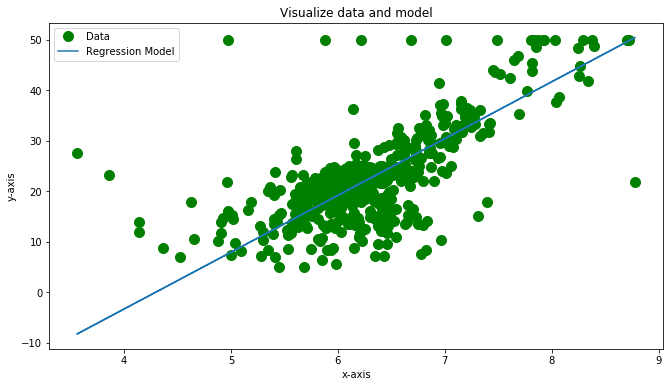

In [80]:

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(11,6))
plt.title('Visualize data and model')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.plot(X, y, 'go', label='Data', marker='o', markersize=10)
plt.plot(X, LinearRegression.w*X + LinearRegression.b, label='Regression Model')
plt.legend();
plt.show()

In [82]:
X_2d = pd.DataFrame(X) # 차원 맞추기 위해서 

In [83]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor() # 선형회귀 모델 정의 
model.fit(X_2d, y) # 모델 학습 

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [86]:
print('회귀계수(w) ', model.coef_)
print('절편(b)', model.intercept_)

회귀계수(w)  [4.00639867]
절편(b) [-3.13283015]


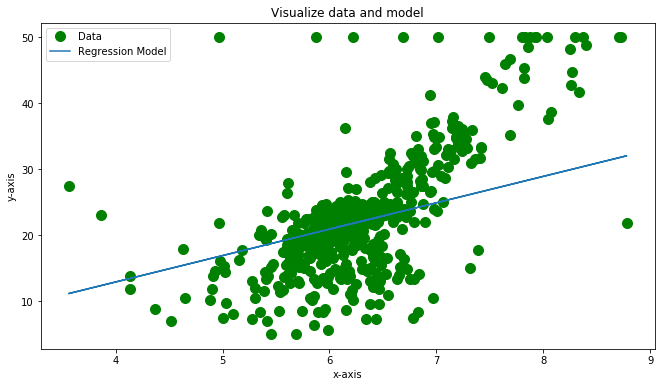

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(11,6))
plt.title('Visualize data and model')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.plot(X, y, 'go', label='Data', marker='o', markersize=10)
# y = wx + b 
plt.plot(X, model.coef_*X + model.intercept_, label='Regression Model')
plt.legend();
plt.show()